In [1]:
from PyQt5 import QtCore, QtGui, QtWidgets
from PyQt5.QtCore import QTimer, QStringListModel, Qt
import plotly.graph_objects as go
import plotly.io as pio
from datetime import date, datetime, timedelta 
import pandas as pd
import sys
import os
import numpy as np
from sklearn.preprocessing import MinMaxScaler

In [2]:
df2 = pd.read_csv(r'C:\Users\Admin\Downloads\IEDE2025\data IEDE\open-meteo-43.90N116.05E990m.csv', skiprows= 3)
df1 = pd.read_csv(r'C:\Users\Admin\Downloads\IEDE2025\data IEDE\open-meteo-43.90N116.05E990m(1).csv', skiprows= 3)
df = pd.concat([df1, df2], axis=0)

In [3]:
df.to_csv("open-meteo-43.90N116.05E990m(2).csv", index=False)

In [4]:
df.rename(columns = {'temperature_2m (°C)':'Temperature', 'relative_humidity_2m (%)':'Humidity', 'wind_speed_10m (km/h)':'Wind Speed', 'shortwave_radiation (W/m²)':'Shortwave Radiation', 'diffuse_radiation (W/m²)':'Diffuse Radiation'}, inplace = True)
df

time  Temperature  Humidity  Wind Speed  \
0     2022-01-01T00:00         -7.6        44        20.1   
1     2022-01-01T01:00         -7.8        45        17.9   
2     2022-01-01T02:00         -8.1        47        14.4   
3     2022-01-01T03:00         -8.8        50        12.1   
4     2022-01-01T04:00         -8.4        50        13.9   
...                ...          ...       ...         ...   
9715  2025-02-08T19:00        -22.9        56         9.4   
9716  2025-02-08T20:00        -24.3        56         8.9   
9717  2025-02-08T21:00        -25.1        62         9.4   
9718  2025-02-08T22:00        -24.8        62         9.6   
9719  2025-02-08T23:00        -25.0        63         9.3   

      Shortwave Radiation  Diffuse Radiation  
0                     0.0                0.0  
1                     0.0                0.0  
2                     0.0                0.0  
3                     0.0                0.0  
4                     0.0                0.0  
...                   ...                ...  
9715                  0.0                0.0  
9716                  0.0                0.0  
9717                  0.0                0.0  
9718                  0.0                0.0  
9719                  0.0                0.0  

[27240 rows x 6 columns]

In [5]:
df['time'] = pd.to_datetime(df['time'])
df

time  Temperature  Humidity  Wind Speed  \
0    2022-01-01 00:00:00         -7.6        44        20.1   
1    2022-01-01 01:00:00         -7.8        45        17.9   
2    2022-01-01 02:00:00         -8.1        47        14.4   
3    2022-01-01 03:00:00         -8.8        50        12.1   
4    2022-01-01 04:00:00         -8.4        50        13.9   
...                  ...          ...       ...         ...   
9715 2025-02-08 19:00:00        -22.9        56         9.4   
9716 2025-02-08 20:00:00        -24.3        56         8.9   
9717 2025-02-08 21:00:00        -25.1        62         9.4   
9718 2025-02-08 22:00:00        -24.8        62         9.6   
9719 2025-02-08 23:00:00        -25.0        63         9.3   

      Shortwave Radiation  Diffuse Radiation  
0                     0.0                0.0  
1                     0.0                0.0  
2                     0.0                0.0  
3                     0.0                0.0  
4                     0.0                0.0  
...                   ...                ...  
9715                  0.0                0.0  
9716                  0.0                0.0  
9717                  0.0                0.0  
9718                  0.0                0.0  
9719                  0.0                0.0  

[27240 rows x 6 columns]

In [6]:
df.isna().sum()

time                   0
Temperature            0
Humidity               0
Wind Speed             0
Shortwave Radiation    0
Diffuse Radiation      0
dtype: int64

In [7]:
print(df['Shortwave Radiation'].unique())

[  0.  37.  99. 278. 380. 394. 363. 275. 138.  25.  64. 202. 320. 392.
 409. 371. 280. 147.  24.  63. 201. 413. 375. 284. 155.  28.  62. 200.
 319. 376. 286. 157.  29. 393. 158.  30. 198. 317. 414. 377. 289. 161.
  32.  65. 205. 327. 402. 423. 387. 298. 166.  33. 415. 379. 291. 164.
  34.  92. 209. 313. 395. 355. 248. 135. 335. 416. 438. 403. 314. 181.
  41.  68. 212. 336. 436. 400. 312. 180.  42.  66. 216. 341. 422. 446.
 410. 318. 188.  46.   1.  70. 215. 340. 420. 442. 407. 189.  48.  35.
 183. 204. 329. 332. 283. 281. 170. 210. 343. 435. 460. 333.  53.  75.
 220. 347. 431. 457. 334.  56.  76. 223. 349. 428. 451.  57.  51. 452.
 206.  61.  78. 227. 464. 430. 211.  80. 228. 462. 429. 342. 226. 350.
 425. 440. 263.  96.  52.  16. 137. 260. 331. 374. 295. 247. 191.  67.
   2. 232. 356. 443. 459. 427. 345.  60. 156. 268. 351. 231. 116. 118.
  86. 230. 367. 421. 401. 293. 194.   3.  95. 250. 383. 469. 498. 467.
 238.  98. 255. 389. 475. 504. 472. 384. 249.   4. 101. 259. 481. 510.
 478. 

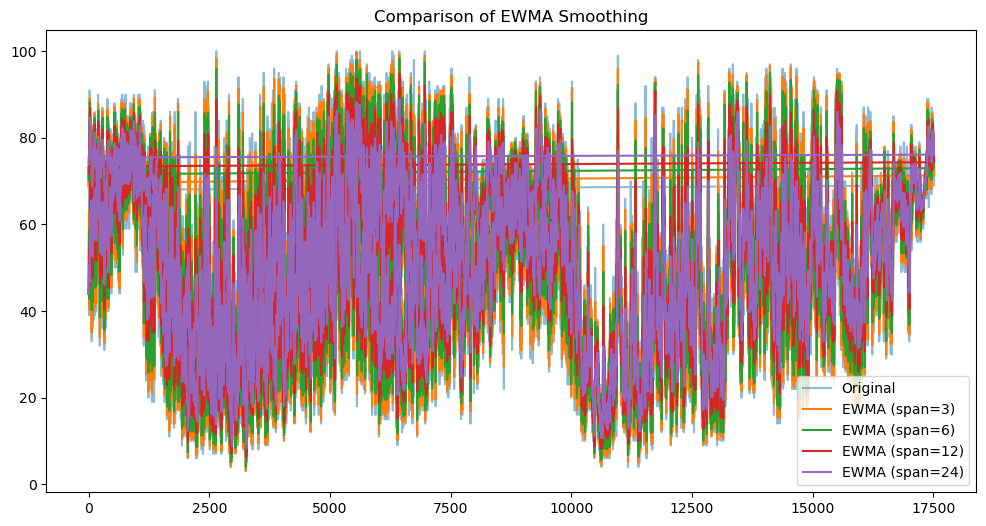

Span = 3, MSE = 14.4354
Span = 6, MSE = 53.7871
Span = 12, MSE = 115.7817
Span = 24, MSE = 171.6196
Best span: 3


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

# Tạo danh sách các giá trị span để thử nghiệm
span_values = [3, 6, 12, 24]

mse_results = {}

plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Humidity'], label='Original', alpha=0.5)

for span in span_values:
    df[f'humidity_ewm_{span}'] = df['Humidity'].ewm(span=span, adjust=False).mean()
    # Đồng bộ index để tránh mismatch
    valid_idx = df.dropna(subset=['Humidity', f'humidity_ewm_{span}']).index

    mse = mean_squared_error(df.loc[valid_idx, 'Humidity'], df.loc[valid_idx, f'humidity_ewm_{span}'])

    # Tính MSE giữa chuỗi gốc và chuỗi làm mịn
    mse_results[span] = mse

    # Vẽ đường làm mịn
    plt.plot(df.index, df[f'humidity_ewm_{span}'], label=f'EWMA (span={span})')

plt.legend()
plt.title('Comparison of EWMA Smoothing')
plt.show()

# In kết quả MSE
for span, mse in mse_results.items():
    print(f'Span = {span}, MSE = {mse:.4f}')

# Chọn span có MSE nhỏ nhất
best_span = min(mse_results, key=mse_results.get)
print(f'Best span: {best_span}')

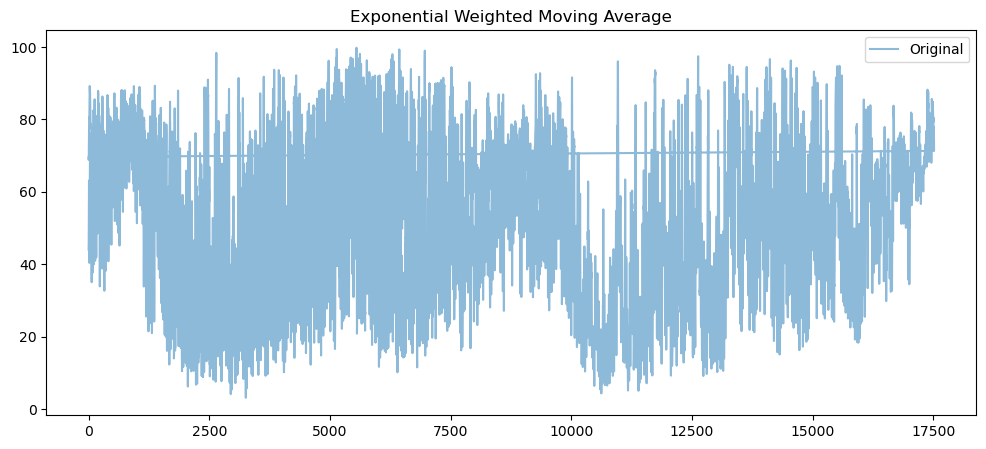

In [9]:
df['Humidity'] = df['Humidity'].ewm(span=3, adjust=False).mean()
import matplotlib.pyplot as plt
# Vẽ biểu đồ so sánh
plt.figure(figsize=(12, 5))
plt.plot(df.index, df['Humidity'], label='Original', alpha=0.5)
plt.legend()
plt.title('Exponential Weighted Moving Average')
plt.show()

In [10]:
from plotly.subplots import make_subplots
fig = go.Figure()
fig = make_subplots(rows=5, cols=1, subplot_titles=('Temperature', 'Humidity', 'Wind Speed', 'Shortwave Radiation', 'Diffuse Radiation'))

# Plot Temperature
fig.add_trace(
    go.Scatter(x=df['time'], y=df['Temperature'], name='Temperature'),
    row=1, col=1
)

# Plot Humidity
fig.add_trace(
    go.Scatter(x=df['time'], y=df['Humidity'], name='Humidity'),
    row=2, col=1
)

# Plot Pressure
fig.add_trace(
    go.Scatter(x=df['time'], y=df['Wind Speed'], name='Wind Speed'),
    row=3, col=1
)

# Plot Wind Direction
fig.add_trace(
    go.Scatter(x=df['time'], y=df['Shortwave Radiation'], name='Shortwave Radiation'),
    row=4, col=1
)

# Plot Wind Speed
fig.add_trace(
    go.Scatter(x=df['time'], y=df['Diffuse Radiation'], name='Diffuse Radiation'),
    row=5, col=1
)

# Update layout
fig.update_layout(height=1200, title_text="Weather Parameters Over Time")
fig.show()

In [11]:
df.shape

(27240, 10)

In [12]:
df['Humidity'] = df['Humidity'].ewm(span=3, adjust=False).mean()
df = df.drop(columns = ['humidity_ewm_3', 'humidity_ewm_6', 'humidity_ewm_12','humidity_ewm_24'])
df

time  Temperature   Humidity  Wind Speed  \
0    2022-01-01 00:00:00         -7.6  44.000000        20.1   
1    2022-01-01 01:00:00         -7.8  44.250000        17.9   
2    2022-01-01 02:00:00         -8.1  45.000000        14.4   
3    2022-01-01 03:00:00         -8.8  46.437500        12.1   
4    2022-01-01 04:00:00         -8.4  47.687500        13.9   
...                  ...          ...        ...         ...   
9715 2025-02-08 19:00:00        -22.9  51.969306         9.4   
9716 2025-02-08 20:00:00        -24.3  53.398813         8.9   
9717 2025-02-08 21:00:00        -25.1  55.906486         9.4   
9718 2025-02-08 22:00:00        -24.8  58.056783         9.6   
9719 2025-02-08 23:00:00        -25.0  59.830162         9.3   

      Shortwave Radiation  Diffuse Radiation  
0                     0.0                0.0  
1                     0.0                0.0  
2                     0.0                0.0  
3                     0.0                0.0  
4                     0.0                0.0  
...                   ...                ...  
9715                  0.0                0.0  
9716                  0.0                0.0  
9717                  0.0                0.0  
9718                  0.0                0.0  
9719                  0.0                0.0  

[27240 rows x 6 columns]

In [13]:
df['time'] = pd.to_datetime(df['time'])
df

time  Temperature   Humidity  Wind Speed  \
0    2022-01-01 00:00:00         -7.6  44.000000        20.1   
1    2022-01-01 01:00:00         -7.8  44.250000        17.9   
2    2022-01-01 02:00:00         -8.1  45.000000        14.4   
3    2022-01-01 03:00:00         -8.8  46.437500        12.1   
4    2022-01-01 04:00:00         -8.4  47.687500        13.9   
...                  ...          ...        ...         ...   
9715 2025-02-08 19:00:00        -22.9  51.969306         9.4   
9716 2025-02-08 20:00:00        -24.3  53.398813         8.9   
9717 2025-02-08 21:00:00        -25.1  55.906486         9.4   
9718 2025-02-08 22:00:00        -24.8  58.056783         9.6   
9719 2025-02-08 23:00:00        -25.0  59.830162         9.3   

      Shortwave Radiation  Diffuse Radiation  
0                     0.0                0.0  
1                     0.0                0.0  
2                     0.0                0.0  
3                     0.0                0.0  
4                     0.0                0.0  
...                   ...                ...  
9715                  0.0                0.0  
9716                  0.0                0.0  
9717                  0.0                0.0  
9718                  0.0                0.0  
9719                  0.0                0.0  

[27240 rows x 6 columns]

In [14]:
# Thêm cột 'Tháng'
df['Month'] = df['time'].dt.to_period('M')
# Thêm cột 'Tháng'
df['Month'] = df['time'].dt.month
df['Year'] = df['time'].dt.year
df

time  Temperature   Humidity  Wind Speed  \
0    2022-01-01 00:00:00         -7.6  44.000000        20.1   
1    2022-01-01 01:00:00         -7.8  44.250000        17.9   
2    2022-01-01 02:00:00         -8.1  45.000000        14.4   
3    2022-01-01 03:00:00         -8.8  46.437500        12.1   
4    2022-01-01 04:00:00         -8.4  47.687500        13.9   
...                  ...          ...        ...         ...   
9715 2025-02-08 19:00:00        -22.9  51.969306         9.4   
9716 2025-02-08 20:00:00        -24.3  53.398813         8.9   
9717 2025-02-08 21:00:00        -25.1  55.906486         9.4   
9718 2025-02-08 22:00:00        -24.8  58.056783         9.6   
9719 2025-02-08 23:00:00        -25.0  59.830162         9.3   

      Shortwave Radiation  Diffuse Radiation  Month  Year  
0                     0.0                0.0      1  2022  
1                     0.0                0.0      1  2022  
2                     0.0                0.0      1  2022  
3                     0.0                0.0      1  2022  
4                     0.0                0.0      1  2022  
...                   ...                ...    ...   ...  
9715                  0.0                0.0      2  2025  
9716                  0.0                0.0      2  2025  
9717                  0.0                0.0      2  2025  
9718                  0.0                0.0      2  2025  
9719                  0.0                0.0      2  2025  

[27240 rows x 8 columns]

C:\Users\Admin\AppData\Local\Temp\ipykernel_24572\761566641.py:26: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.

C:\Users\Admin\AppData\Local\Temp\ipykernel_24572\761566641.py:26: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.

C:\Users\Admin\AppData\Local\Temp\ipykernel_24572\761566641.py:26: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.

C:\Users\Admin\AppData\Local\Temp\ipykernel_24572\761566641.py:26: MatplotlibDeprecationWarning:

The get_cmap function was dep

IndexError: index 3 is out of bounds for axis 0 with size 3

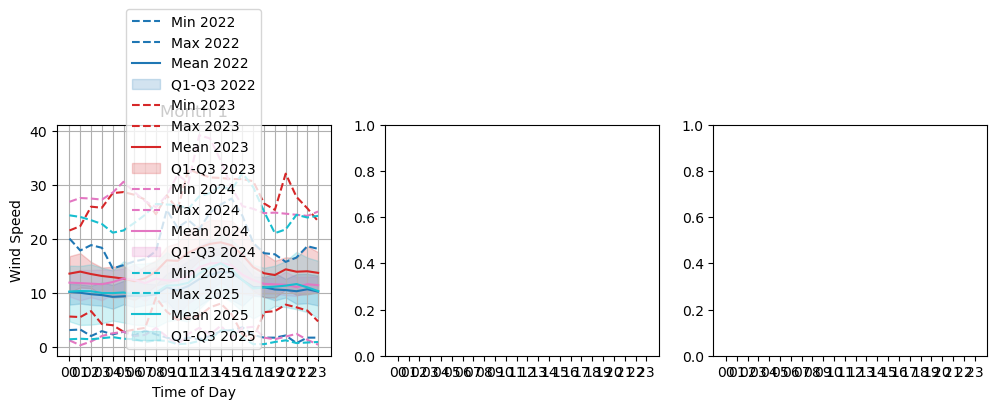

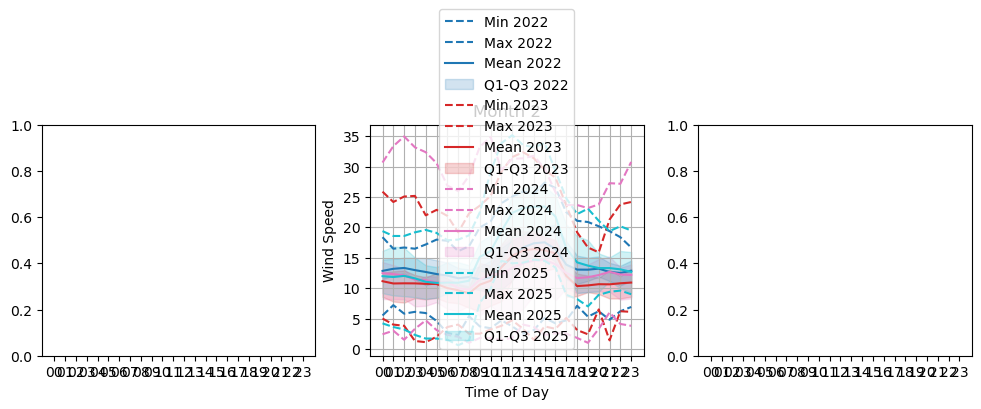

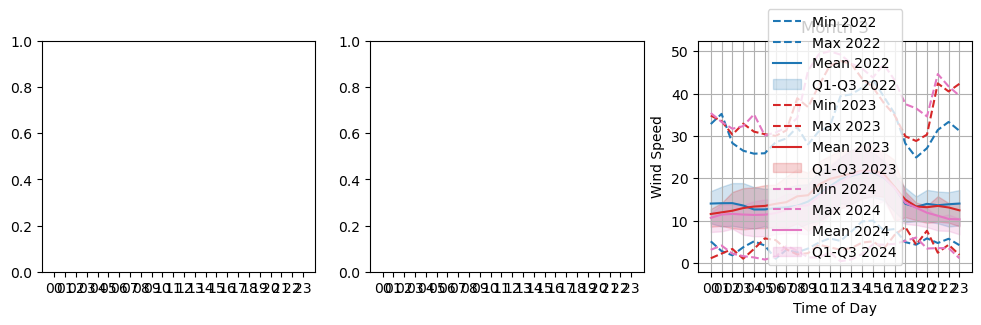

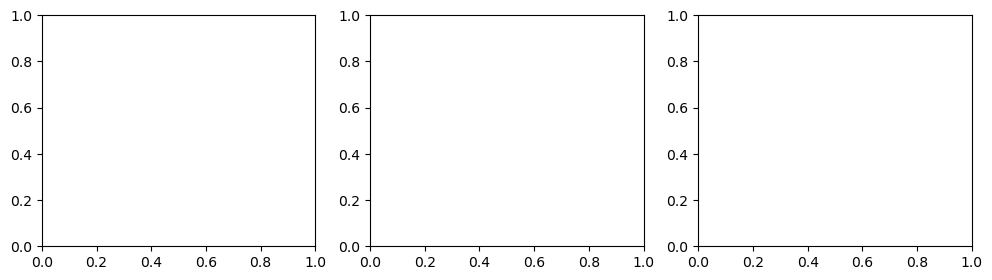

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Giả sử df đã có các cột 'Month', 'Year', 'time', 'Wind Speed'
months = sorted(df['Month'].unique())  # Đảm bảo thứ tự tháng
years = sorted(df['Year'].unique())    # Thứ tự năm
num_months = len(months)

# Số hàng = số tháng, số cột = 1
#nrows = num_months
#ncols = 3
#fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(12, 3 * nrows), sharex=True)
#fig.subplots_adjust(hspace=0.4)

#axes = axes.ravel()  # Chuyển mảng 2D thành mảng 1D
#colors = plt.cm.get_cmap("tab10", len(years))  # Lấy màu khác nhau cho các năm

for i, month in enumerate(months):
    ncols = 3
    fig, axes = plt.subplots(nrows=1, ncols=ncols, figsize=(12, 3), sharex=True)
    fig.subplots_adjust(hspace=0.4)

    axes = axes.ravel()  # Chuyển mảng 2D thành mảng 1D
    colors = plt.cm.get_cmap("tab10", len(years))
    ax = axes[i]
    for j, year in enumerate(years):
        # Lọc dữ liệu theo tháng và năm
        df_month_year = df[(df['Month'] == month) & (df['Year'] == year)]
        
        if df_month_year.empty:
            continue
        
        # Tính các giá trị thống kê theo từng giờ
        quantiles = df_month_year.groupby(df_month_year['time'].dt.strftime('%H')).agg({
            'Wind Speed': ['min', 'max', 'mean', 
                           ('25th percentile', lambda x: np.percentile(x, 25)), 
                           ('75th percentile', lambda x: np.percentile(x, 75))]
        })
        
        color = colors(j)  # Lấy màu cho năm hiện tại

        # Vẽ các đường thống kê
        ax.plot(quantiles.index, quantiles[('Wind Speed', 'min')], linestyle="--", color=color, label=f'Min {year}')
        ax.plot(quantiles.index, quantiles[('Wind Speed', 'max')], linestyle="--", color=color, label=f'Max {year}')
        ax.plot(quantiles.index, quantiles[('Wind Speed', 'mean')], linestyle="-", color=color, label=f'Mean {year}')
        ax.fill_between(quantiles.index, quantiles[('Wind Speed', '25th percentile')], 
                        quantiles[('Wind Speed', '75th percentile')], color=color, alpha=0.2, label=f'Q1-Q3 {year}')

    ax.set_title(f"Month {month}")
    ax.set_xlabel("Time of Day")
    ax.set_ylabel("Wind Speed")
    ax.legend()
    ax.grid(True)

plt.show()


In [ ]:
months = df['Month'].unique()
years = df['Year'].unique()
num_months = len(months)
num_years = len(years)
nrows = num_months 
ncols =  num_years # Số cột của subplot
fig, axes = plt.subplots(nrows=4, ncols=12, figsize=(120, nrows * 20))
fig.subplots_adjust(left=0.05, right=0.95, top=0.95, bottom=0.05, wspace=0.2, hspace=0.2)

for i, month in enumerate(months):
    for year in range(num_years):
        fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(120, nrows * 20))
        fig.subplots_adjust(left=0.05, right=0.95, top=0.95, bottom=0.05, wspace=0.2, hspace=0.2)   
        ax = axes[year, month-1]
        # Lọc dữ liệu cho từng tháng
        df_month = df[df['Month'] == month]
        # Tính các giá trị thống kê
        quantiles = df_month.groupby(df_month['time'].dt.strftime('%H')).agg({
            'Wind Speed': ['min', 'max', 'mean', 
                        ('25th percentile', lambda x: np.percentile(x, 25)), 
                        ('75th percentile', lambda x: np.percentile(x, 75))]
        })
        print(f"Month: {month}")
        print(quantiles)
        # Plot the quantiles
        plt.figure(figsize=(10, 6))
        ax.plot(quantiles.index, quantiles[('Wind Speed', 'min')], label='Min Wind Speed')
        ax.plot(quantiles.index, quantiles[('Wind Speed', 'max')], label='Max Wind Speed')
        ax.plot(quantiles.index, quantiles[('Wind Speed', 'mean')], label='Mean Wind Speed')
        ax.plot(quantiles.index, quantiles[('Wind Speed', '25th percentile')], label='25th Percentile')
        ax.plot(quantiles.index, quantiles[('Wind Speed', '75th percentile')], label='75th Percentile')
        ax.set_xlabel('Time of Day')
        ax.set_ylabel("Wind Speed")
        ax.legend()
        ax.grid(True)
        #plt.fill_between(quantiles.index, quantiles[('Wind Speed', 'min')], quantiles[('Wind Speed', 'max')], color='gray', alpha=0.3, label='Min-Max Range')
    plt.gcf().set_size_inches(80, 40)
    plt.tight_layout()
    plt.show()

KeyboardInterrupt: 

In [ ]:
print(months)

<PeriodArray>
['2022-01', '2022-02', '2022-03', '2022-04', '2022-05', '2022-06', '2022-07',
 '2022-08', '2022-09', '2022-10', '2022-11', '2022-12', '2023-01', '2023-02',
 '2023-03', '2023-04', '2023-05', '2023-06', '2023-07', '2023-08', '2023-09',
 '2023-10', '2023-11', '2023-12', '2024-01', '2024-02', '2024-03', '2024-04',
 '2024-05', '2024-06', '2024-07', '2024-08', '2024-09', '2024-10', '2024-11',
 '2024-12', '2025-01', '2025-02']
Length: 38, dtype: period[M]


In [ ]:

# Thêm cột 'Tháng'
df['Month'] = df_merged['time'].dt.to_period('M')

# Tách dữ liệu theo từng tháng
months = df_merged['Tháng'].unique()

# Tạo figure và axes
num_months = len(months)
ncols = 6  # Số cột của subplot
nrows = int(np.ceil(num_months / ncols))  # Tính số hàng của subplot
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, nrows * 5))

# Đảm bảo axes là mảng 2D
axes = axes.flatten()


In [ ]:
df['time'] = pd.to_datetime(df['time'])

# Trích xuất các thông tin quan trọng
#df['hour'] = df['time'].dt.hour  # Lấy giờ (0-23)
#df['day_of_year'] = df['time'].dt.dayofyear  # Lấy ngày trong năm (0-365)

# Chuyển đổi thành feature tuần hoàn (sin, cos)
#df['hour_sin'] = np.sin(2 * np.pi * df['hour'] / 24)
#df['hour_cos'] = np.cos(2 * np.pi * df['hour'] / 24)

#df['day_sin'] = np.sin(2 * np.pi * df['day_of_year'] / 365)
#df['day_cos'] = np.cos(2 * np.pi * df['day_of_year'] / 365)


In [14]:
#df = df.drop(columns=['hour', 'day_of_year', ])
#df_time = df['time']
#df = df.drop(columns=['time'])
#df

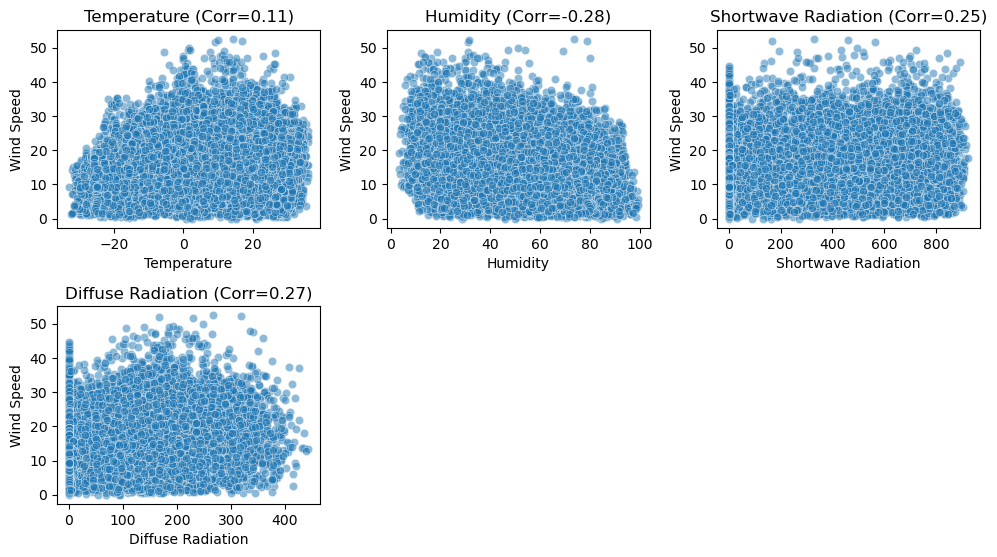

In [15]:
import seaborn as sns
features = ['Temperature', 'Humidity', 'Shortwave Radiation', 'Diffuse Radiation']

plt.figure(figsize=(10, 8))

for i, feature in enumerate(features, 1):
    plt.subplot(3, 3, i)  # Chia thành 2x2 grid
    correlation = df[[feature, 'Wind Speed']].corr().iloc[0, 1]
    
    # Vẽ scatter plot
    sns.scatterplot(x=df[feature], y=df['Wind Speed'], alpha=0.5)
    plt.title(f"{feature} (Corr={correlation:.2f})")
    plt.xlabel(feature)
    plt.ylabel("Wind Speed")

plt.tight_layout()
plt.show()

In [16]:
df['Temperature'] = pd.to_numeric(df['Temperature'], errors='coerce')
df['Humidity'] = pd.to_numeric(df['Humidity'], errors='coerce')
df['Wind Speed'] = pd.to_numeric(df['Wind Speed'], errors='coerce')
df['Shortwave Radiation'] = pd.to_numeric(df['Shortwave Radiation'], errors='coerce')
df['Diffuse Radiation'] = pd.to_numeric(df['Diffuse Radiation'], errors='coerce')


In [17]:

# Handle outliers using IQR method
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[column] = df[column].clip(lower=lower_bound, upper=upper_bound)
    return df


# Apply outlier removal to numeric columns
numeric_columns = ['Temperature', 'Humidity',  'Wind Speed', 'Shortwave Radiation', 'Diffuse Radiation']
for col in numeric_columns:
    df = remove_outliers(df, col)

In [18]:
print(df.dtypes)

time                   datetime64[ns]
Temperature                   float64
Humidity                      float64
Wind Speed                    float64
Shortwave Radiation           float64
Diffuse Radiation             float64
dtype: object


In [19]:
df

time  Temperature   Humidity  Wind Speed  \
0    2022-01-01 00:00:00         -7.6  44.000000        20.1   
1    2022-01-01 01:00:00         -7.8  44.250000        17.9   
2    2022-01-01 02:00:00         -8.1  45.000000        14.4   
3    2022-01-01 03:00:00         -8.8  46.437500        12.1   
4    2022-01-01 04:00:00         -8.4  47.687500        13.9   
...                  ...          ...        ...         ...   
9715 2025-02-08 19:00:00        -22.9  51.969306         9.4   
9716 2025-02-08 20:00:00        -24.3  53.398813         8.9   
9717 2025-02-08 21:00:00        -25.1  55.906486         9.4   
9718 2025-02-08 22:00:00        -24.8  58.056783         9.6   
9719 2025-02-08 23:00:00        -25.0  59.830162         9.3   

      Shortwave Radiation  Diffuse Radiation  
0                     0.0                0.0  
1                     0.0                0.0  
2                     0.0                0.0  
3                     0.0                0.0  
4                     0.0                0.0  
...                   ...                ...  
9715                  0.0                0.0  
9716                  0.0                0.0  
9717                  0.0                0.0  
9718                  0.0                0.0  
9719                  0.0                0.0  

[27240 rows x 6 columns]

In [20]:
#def create_sequences(X, y, time_steps, upsample_factor=3):
    #X_seq, y_seq = [], []
    #threshold = np.percentile(y, 5)  # Ngưỡng 5% nhỏ nhất

    #for i in range(len(X) - time_steps):
        #X_window = X.iloc[i:i+time_steps].values  # Lấy time_steps bước trước làm input
        #y_target = y.iloc[i+time_steps ]  # Lấy Wind Speed của bước tiếp theo làm output

        #X_seq.append(X_window)
        #y_seq.append(y_target)

        # Nếu y_target thuộc nhóm giá trị nhỏ, thực hiện nhân bản
        #if y_target.item() <= threshold:
            #for _ in range(upsample_factor - 1):  # Nhân bản mẫu này (mặc định là 2 lần)
                #X_seq.append(X_window)
                #y_seq.append(y_target)

    #return np.array(X_seq), np.array(y_seq)

In [21]:
def create_sequences(X, y, time_steps):
    X_seq, y_seq = [], []
    
    for i in range(len(X) - time_steps):
        X_seq.append(X.iloc[i:i+time_steps].values)  # Lấy time_steps bước trước làm input
        y_seq.append(y.iloc[i+time_steps])  # Lấy Wind Speed của bước tiếp theo làm output
    
    return np.array(X_seq), np.array(y_seq)

In [22]:
from sklearn.model_selection import train_test_split
def data_processing(df, time_steps):
    # Loại bỏ cột 'time' nếu có
    df = df.drop(columns=['time'], errors='ignore')
    
    # Khởi tạo MinMaxScaler
    scaler_X = MinMaxScaler()
    scaler_y = MinMaxScaler()

    # Chuẩn hóa X và y
    X_scaled = scaler_X.fit_transform(df)
    y_scaled = scaler_y.fit_transform(df[['Wind Speed']])

    X = pd.DataFrame(X_scaled, columns=df.columns)
    y = pd.DataFrame(y_scaled, columns=['Wind Speed'])

    X = X.iloc[:-time_steps]
    y = y.iloc[:-time_steps]

    #num_rows = X.shape[0]
    #X_train, X_valid = X[:int(num_rows * 0.8)], X[int(num_rows * 0.2):]
    #y_train, y_valid = y[:int(num_rows * 0.8)], y[int(num_rows * 0.2):]
    X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)
    # Tạo chuỗi thời gian cho mô hình
    X_seq_train, y_seq_train = create_sequences(X_train, y_train, time_steps)
    X_seq_valid, y_seq_valid = create_sequences(X_valid, y_valid, time_steps)

    return X_seq_train, y_seq_train, X_seq_valid, y_seq_valid, scaler_X, scaler_y

In [23]:
X_seq_train, y_seq_train, X_seq_valid, y_seq_valid, scaler_X, scaler_y = data_processing(df, time_steps=6)

In [24]:
print(X_seq_train[:3], y_seq_train[:3])

[[[0.36758321 0.42414157 0.60179641 0.         0.        ]
  [0.36468886 0.42674954 0.53592814 0.         0.        ]
  [0.36034732 0.43457346 0.43113772 0.         0.        ]
  [0.35021708 0.4495693  0.36227545 0.         0.        ]
  [0.35600579 0.46260917 0.41616766 0.         0.        ]
  [0.35745297 0.47450804 0.45508982 0.         0.        ]]

 [[0.36468886 0.42674954 0.53592814 0.         0.        ]
  [0.36034732 0.43457346 0.43113772 0.         0.        ]
  [0.35021708 0.4495693  0.36227545 0.         0.        ]
  [0.35600579 0.46260917 0.41616766 0.         0.        ]
  [0.35745297 0.47450804 0.45508982 0.         0.        ]
  [0.33719247 0.49879479 0.44311377 0.         0.        ]]

 [[0.36034732 0.43457346 0.43113772 0.         0.        ]
  [0.35021708 0.4495693  0.36227545 0.         0.        ]
  [0.35600579 0.46260917 0.41616766 0.         0.        ]
  [0.35745297 0.47450804 0.45508982 0.         0.        ]
  [0.33719247 0.49879479 0.44311377 0.         0.   

In [25]:
import torch.nn as nn
import torch
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset
from torchmetrics import MeanSquaredError
from torchinfo import summary



class CNNLSTMModel(nn.Module):
    def __init__(self, input_dim):
        super(CNNLSTMModel, self).__init__()
        self.conv1d = nn.Conv1d(in_channels=input_dim, out_channels=64, kernel_size=2)
        self.batchnorm = nn.BatchNorm1d(64)
        self.lstm1 = nn.LSTM(input_size=64, hidden_size=50, batch_first=True, bidirectional=True)
        self.lstm2 = nn.LSTM(input_size=100, hidden_size=100, batch_first=True, bidirectional=True)
        self.dropout = nn.Dropout(p=0.25)
        self.fc = nn.Linear(200, 1)
        self.activation = nn.Identity()
        self.relu = nn.ReLU()
        # Áp dụng khởi tạo trọng số
        self.apply(self._init_weights)

    def _init_weights(self, module):
        """Khởi tạo trọng số của mô hình"""
        if isinstance(module, nn.Conv1d):
            nn.init.kaiming_normal_(module.weight, mode='fan_out', nonlinearity='relu')
            if module.bias is not None:
                nn.init.constant_(module.bias, 0)
        elif isinstance(module, nn.LSTM):
            for name, param in module.named_parameters():
                if "weight_ih" in name:
                    nn.init.xavier_uniform_(param)
                elif "weight_hh" in name:
                    nn.init.orthogonal_(param)
                elif "bias" in name:
                    nn.init.constant_(param, 0)
        elif isinstance(module, nn.Linear):
            nn.init.xavier_uniform_(module.weight)
            if module.bias is not None:
                nn.init.constant_(module.bias, 0)
    
    def forward(self, x):
        x = x.permute(0, 2, 1) 
        x = self.conv1d(x) #(batch_size, channels, time_steps)
        x = self.relu(x)
        x = self.batchnorm(x)  #(batch_size, channels, time_steps)
        x = x.permute(0, 2, 1) #(batch_size, time_steps, channels)
        x, _ = self.lstm1(x) #(batch_size, time_steps, hidden_size)
        x,_ = self.lstm2(x) #(batch_size, time_steps, hidden_size)
        x = self.dropout(x) #(batch_size, time_steps, hidden_size)
        x = x[:, -1, :] #(batch_size, hidden_size)
        x = self.fc(x)
        return x
    
model1 = CNNLSTMModel(input_dim = 5)
summary(model1, input_size=(1, 6, 5))

KeyboardInterrupt: 

In [ ]:
def train(model, train_loader, criterion, optimizer, num_epochs, device, early_stopping = None):
    model.to(device)
    losses = []
    for epoch in range(num_epochs):
        model.train()
        total_loss = 0
        for inputs, targets in train_loader:
            inputs, targets = inputs.to(device), targets.to(device)
            optimizer.zero_grad()
            output = model(inputs)
            loss = criterion(output, targets)
            loss.backward()
            
            optimizer.step()
            
            total_loss += loss.item()
            
        avg_total_loss = total_loss / len(train_loader)
        losses.append(avg_total_loss)
        print(f"Epoch [{epoch+1}/{num_epochs}], Train Loss: {avg_total_loss:.6f}")
        
        if early_stopping:
            early_stopping(patience = 5, min_delta = 0.0)
            if early_stopping.__call__(avg_total_loss):
                break
    return losses

In [ ]:
class EarlyStopping:
    def __init__(self, patience = 3, min_delta = 0.0):
        """
        Args:
            patience (int): Số epoch chờ trước khi dừng nếu không có cải thiện.
            min_delta (float): Ngưỡng tối thiểu để xác định có cải thiện hay không.
        """
        self.patience = patience 
        self.min_delta = min_delta
        self.best_loss = float('inf')
        self.counter = 0
        
        def __call__(self, loss):
            if loss < self. best_loss - self.min_delta:
                self.best_loss = loss 
                self.counter = 0
            else:
                self.counter += 1
                if self.counter >= self.patience:
                    print(f"Early stopping triggered after {self.patience} epochs!")
                    return True
            return False

In [ ]:
# Check for CUDA
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")
import numpy as np

delta = 0.05 * np.std(y_seq_train)  # 5% độ lệch chuẩn
criterion = nn.HuberLoss(delta=delta)
optimizer = optim.Adam(model1.parameters(), lr = 0.01)
early_stopping = EarlyStopping(patience = 5, min_delta = 0.0)

Using device: cuda


In [ ]:
X_seq_train = torch.tensor(X_seq_train, dtype=torch.float32).clone().detach()
y_seq_train = torch.tensor(y_seq_train, dtype=torch.float32).unsqueeze(1).clone().detach()
X_seq_test = torch.tensor(X_seq_valid, dtype=torch.float32).clone().detach()
y_seq_test = torch.tensor(y_seq_valid, dtype=torch.float32).unsqueeze(1).clone().detach()  # Increased to capture daily patterns better
y_seq_train = y_seq_train.view(-1, 1)  # Định dạng lại tensor về đúng shape

epochs = 100   
batch_size = 64
dataset = torch.utils.data.TensorDataset(X_seq_train, y_seq_train)
dataloader = torch.utils.data.DataLoader(dataset, batch_size=batch_size, shuffle=True)

print(X_seq_train.shape, y_seq_train.shape)

torch.Size([21781, 6, 5]) torch.Size([21781, 1])


In [ ]:
losses = train(model1, dataloader, criterion, optimizer, epochs, device)

Epoch [1/100], Train Loss: 0.000809
Epoch [2/100], Train Loss: 0.000675
Epoch [3/100], Train Loss: 0.000658
Epoch [4/100], Train Loss: 0.000661
Epoch [5/100], Train Loss: 0.000644
Epoch [6/100], Train Loss: 0.000638
Epoch [7/100], Train Loss: 0.000624
Epoch [8/100], Train Loss: 0.000619
Epoch [9/100], Train Loss: 0.000615
Epoch [10/100], Train Loss: 0.000617
Epoch [11/100], Train Loss: 0.000614
Epoch [12/100], Train Loss: 0.000615
Epoch [13/100], Train Loss: 0.000611
Epoch [14/100], Train Loss: 0.000596
Epoch [15/100], Train Loss: 0.000602
Epoch [16/100], Train Loss: 0.000607
Epoch [17/100], Train Loss: 0.000597
Epoch [18/100], Train Loss: 0.000601
Epoch [19/100], Train Loss: 0.000596
Epoch [20/100], Train Loss: 0.000597
Epoch [21/100], Train Loss: 0.000600
Epoch [22/100], Train Loss: 0.000589
Epoch [23/100], Train Loss: 0.000582
Epoch [24/100], Train Loss: 0.000584
Epoch [25/100], Train Loss: 0.000589
Epoch [26/100], Train Loss: 0.000585
Epoch [27/100], Train Loss: 0.000584
Epoch [28/

In [ ]:
model1.eval()
X_seq_test = X_seq_test.to(device)
y_pred = model1(X_seq_test).detach().cpu().numpy()
y_test = y_seq_test.numpy().reshape(-1, 1)

In [ ]:
print(y_pred.shape)
print(y_test.shape)
print(len(numeric_columns))

(5441, 1)
(5441, 1)
5


In [ ]:
import numpy as np

#def merge_upsampled_values(y_test, y_pred, upsample_factor=3):
    #y_test_filtered = []
    #y_pred_merged = []
    
    #i = 0
    #while i < len(y_test):
        #if i < len(y_test) - 2 and y_test[i] == y_test[i + 1] == y_test[i + 2]:  
            # Nếu có 3 giá trị liên tiếp giống nhau => bị upsampling
            #y_test_filtered.append(y_test[i])  # Chỉ lấy 1 giá trị y_test
            #alpha = 0.7  # Hệ số trọng số, gần 1 thì ưu tiên giá trị gần hơn
            #ema_value = np.average(y_pred[i:i + upsample_factor].flatten(), weights=[alpha**j for j in range(upsample_factor)])
            #y_pred_merged.append(ema_value.item())
            #y_pred_merged.append(np.median(y_pred[i:i + upsample_factor]).item())  # Trung bình y_pred
            #i += upsample_factor  # Bỏ qua 2 phần tử tiếp theo
        #else:
            # Nếu không bị upsample, giữ nguyên
            #y_test_filtered.append(y_test[i])
            #y_pred_merged.append(y_pred[i].item())
            #i += 1  # Chỉ tăng 1 bước

    #return np.array(y_test_filtered), np.array(y_pred_merged)

# Gọi hàm xử lý
#y_test, y_pred = merge_upsampled_values(y_test, y_pred, upsample_factor=3)

y_pred = y_pred[1:]
y_test = y_test[:-1]


In [ ]:
y_pred = scaler_y.inverse_transform(y_pred.reshape(-1, 1))
y_test = scaler_y.inverse_transform(y_test.reshape(-1, 1))

In [ ]:
print(y_pred.shape)
print(y_test.shape)


(5440, 1)
(5440, 1)


In [ ]:
print(f"The predicted values are: {y_pred[-1].flatten()}")
print(f"The actual values are: {y_test[-1].flatten()}")

The predicted values are: [9.410515]
The actual values are: [13.400001]


In [ ]:
#pred_array = np.zeros((len(y_pred), len(numeric_columns)))
pred_array = y_pred.flatten()
#
#np.column_stack([np.zeros((len(y_pred), len(numeric_columns)-1)), y_pred])
#)[:, -1]
print(f"Pred Array: {pred_array[:20]}")
#print(f"Original Pred Values: {y_pred_orig[:20]}")
test_array = y_test.flatten()  # Put test values in the last column (Wind_speed)
print(f"Test Array: {test_array[:20]}")
# Convert predictions back to original scale using the scaler
#y_test_orig = scaler_y.inverse_transform(test_array)[:, -1]
#print(f"Original Test Values: {y_test_orig[:20]}")

Pred Array: [12.107291   9.5201235  9.464346   9.210982  17.446056  13.331941
 20.73705   20.12753   17.587677  21.822153  21.117937  19.63382
 19.25608   16.837908  15.086157  15.888403  12.287418   8.248426
 17.212297  21.661394 ]
Test Array: [10.599999 10.9      10.5      10.400001 15.8      15.7      18.5
 20.5      19.4      21.8      20.6      19.599998 18.7      17.2
 16.1      16.4      10.8       8.1      14.       26.2     ]


In [ ]:
from sklearn.metrics import mean_absolute_error
# Chia dữ liệu thành 2 nhóm: giá trị nhỏ (<= threshold) và lớn hơn threshold
threshold = np.percentile(y_test, 5)  # Lấy ngưỡng 5% nhỏ nhất

# Nhóm giá trị nhỏ
mask_small = y_test <= threshold
mae_small = mean_absolute_error(y_test[mask_small], y_pred[mask_small])

# Nhóm còn lại
mask_large = y_test > threshold
mae_large = mean_absolute_error(y_test[mask_large], y_pred[mask_large])

print(f"MAE trên giá trị nhỏ (<= {threshold:.2f}): {mae_small:.4f}")
print(f"MAE trên giá trị lớn (> {threshold:.2f}): {mae_large:.4f}")

# Tính % lỗi của nhóm nhỏ so với tổng thể
mae_ratio = mae_small / (mae_small + mae_large) * 100
print(f"Tỷ lệ lỗi từ giá trị nhỏ đóng góp: {mae_ratio:.2f}%")


MAE trên giá trị nhỏ (<= 3.09): 1.2778
MAE trên giá trị lớn (> 3.09): 0.9660
Tỷ lệ lỗi từ giá trị nhỏ đóng góp: 56.95%


In [ ]:
num_small = np.sum(y_test <= threshold)
num_large = np.sum(y_test > threshold)

print(f"Ngưỡng (5th percentile): {threshold:.4f}")
print(f"Số lượng giá trị ≤ {threshold:.4f}: {num_small}")
print(f"Số lượng giá trị > {threshold:.4f}: {num_large}")

Ngưỡng (5th percentile): 3.0950
Số lượng giá trị ≤ 3.0950: 272
Số lượng giá trị > 3.0950: 5168


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

if not isinstance(test_array, np.ndarray):
    test_array = test_array.cpu().numpy()

# MAE
mae = mean_absolute_error(test_array, pred_array)

#RMSE
rmse = np.sqrt(mean_squared_error(test_array, pred_array))

#MAPE
smape = np.mean(2 * np.abs(test_array - pred_array) / (np.abs(test_array) + np.abs(pred_array) + 1e-8)) * 100

# MAPE (Mean Absolute Percentage Error)
mape = np.mean(np.abs((test_array - pred_array) / (test_array + 1e-8))) * 100

epsilon = 0.1  # Giá trị nhỏ để tránh chia cho 0
clipped_mape = np.mean(np.abs((test_array - pred_array) / np.maximum(np.abs(test_array), epsilon))) * 100

mspe = np.mean(((test_array - pred_array) / (test_array + 1e-8))**2) * 100

denom = np.mean(np.abs(np.diff(test_array)))  # Sai số trung bình của dữ liệu thực tế
mase = np.mean(np.abs(test_array - pred_array)) / (denom + 1e-8)


print(f"MAE: {mae:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"SMAPE: {smape:.4f}%")
print(f"Clipped MAPE: {clipped_mape:.4f}%")
#print(f"MSPE: {mspe:.4f}%")


MAE: 0.9816
RMSE: 1.4766
SMAPE: 10.8399%
Clipped MAPE: 15.2296%


In [ ]:
from scipy.stats.mstats import winsorize
from sklearn.metrics import mean_absolute_error, mean_squared_error
percentile = 5  # Giới hạn 5% giá trị nhỏ nhất

# Giới hạn dữ liệu trong khoảng [p5, p95]
y_test_winsorized = winsorize(y_test, limits=(percentile/100, 0))  # Chỉ giới hạn phía dưới
y_pred_winsorized = winsorize(y_pred, limits=(percentile/100, 0))

# Tính lại các metric
mae = mean_absolute_error(y_test_winsorized, y_pred_winsorized)
rmse = np.sqrt(mean_squared_error(y_test_winsorized, y_pred_winsorized))
smape = np.mean(2 * np.abs(y_test_winsorized - y_pred_winsorized) / 
                (np.abs(y_test_winsorized) + np.abs(y_pred_winsorized) + 1e-8)) * 100
clipped_mape = np.mean(np.minimum(np.abs(y_test_winsorized - y_pred_winsorized) / 
                                  (np.abs(y_test_winsorized) + 1e-8), 1)) * 100
mspe = np.mean(((y_test_winsorized - y_pred_winsorized) / (y_test_winsorized + 1e-8)) ** 2) * 100
#mase = mae / np.mean(np.abs(np.diff(y_test_winsorized)))  # Định nghĩa của MASE

print(f"MAE: {mae:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"SMAPE: {smape:.4f}%")
print(f"Clipped MAPE: {clipped_mape:.4f}%")
print(f"MSPE: {mspe:.4f}%")
#print(f"MASE: {mase:.4f}")


MAE: 0.9487
RMSE: 1.4449
SMAPE: 9.0246%
Clipped MAPE: 9.3593%
MSPE: 2.4559%


In [ ]:
percentile = 5  # Lọc 5% giá trị nhỏ nhất
threshold_test = np.percentile(y_test, percentile)
threshold_pred = np.percentile(y_pred, percentile)
threshold = min(threshold_test, threshold_pred)

mask = (test_array >= threshold) & (pred_array >= threshold)

filtered_pred = pred_array[mask]
filtered_test = test_array[mask]

print(f"Filtered Pred Array: {filtered_pred[:20]}")
print(f"Filtered Test Array: {filtered_test[:20]}")
print(f"Length of Filtered Pred Array: {len(filtered_pred)}")
print(f"Length of Filtered Test Array: {len(filtered_test)}")

Filtered Pred Array: [12.107291   9.5201235  9.464346   9.210982  17.446056  13.331941
 20.73705   20.12753   17.587677  21.822153  21.117937  19.63382
 19.25608   16.837908  15.086157  15.888403  12.287418   8.248426
 17.212297  21.661394 ]
Filtered Test Array: [10.599999 10.9      10.5      10.400001 15.8      15.7      18.5
 20.5      19.4      21.8      20.6      19.599998 18.7      17.2
 16.1      16.4      10.8       8.1      14.       26.2     ]
Length of Filtered Pred Array: 5145
Length of Filtered Test Array: 5145


In [ ]:
test_array = filtered_test
pred_array = filtered_pred

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

if not isinstance(test_array, np.ndarray):
    test_array = test_array.cpu().numpy()

# MAE
mae = mean_absolute_error(test_array, pred_array)

#RMSE
rmse = np.sqrt(mean_squared_error(test_array, pred_array))

#MAPE
smape = np.mean(2 * np.abs(test_array - pred_array) / (np.abs(test_array) + np.abs(pred_array) + 1e-8)) * 100

# MAPE (Mean Absolute Percentage Error)
mape = np.mean(np.abs((test_array - pred_array) / (test_array + 1e-8))) * 100

epsilon = 0.1  # Giá trị nhỏ để tránh chia cho 0
clipped_mape = np.mean(np.abs((test_array - pred_array) / np.maximum(np.abs(test_array), epsilon))) * 100

mspe = np.mean(((test_array - pred_array) / (test_array + 1e-8))**2) * 100

denom = np.mean(np.abs(np.diff(test_array)))  # Sai số trung bình của dữ liệu thực tế
mase = np.mean(np.abs(test_array - pred_array)) / (denom + 1e-8)



print(f"MAE: {mae:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"SMAPE: {smape:.4f}%")
print(f"Clipped MAPE: {clipped_mape:.4f}%")
print(f"MSPE: {mspe:.4f}%")
print(f"MASE: {mase:.4f}")

MAE: 0.9665
RMSE: 1.4706
SMAPE: 8.5424%
Clipped MAPE: 8.7876%
MSPE: 2.1392%
MASE: 0.5587


In [ ]:
print(f"Min Test Array: {y_test.min()}")
print(f"Max Test Array: {y_test.max()}")
print(f"Min Pred Array: {y_pred.min()}")
print(f"Max Pred Array: {y_pred.max()}")
print(f"Mean Test Array: {y_test.mean()}")
print(f"Mean Pred Array: {y_pred.mean()}")
print(f"Median Test Array: {np.median(y_test)}")
print(f"Median Pred Array: {np.median(y_pred)}")


Min Test Array: 0.0
Max Test Array: 33.400001525878906
Min Pred Array: 0.38166430592536926
Max Pred Array: 33.361083984375
Mean Test Array: 12.52845573425293
Mean Pred Array: 12.357538223266602
Median Test Array: 11.200000762939453
Median Pred Array: 10.92795181274414


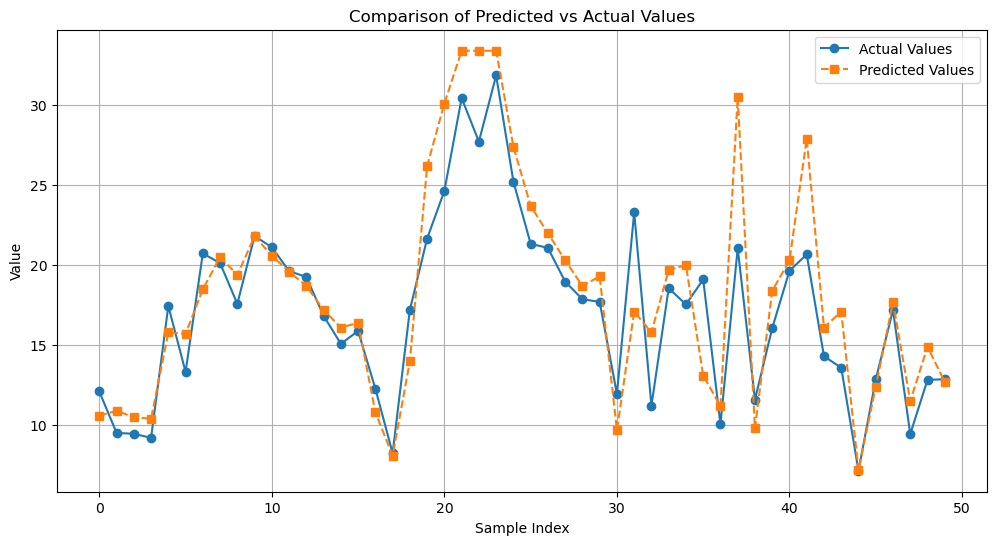

In [ ]:
import matplotlib.pyplot as plt

# Số lượng mẫu để hiển thị

plt.figure(figsize=(12, 6))

# Vẽ đường giá trị thực tế
plt.plot(pred_array[:50], label="Actual Values", marker="o", linestyle="-")

# Vẽ đường giá trị dự đoán
plt.plot(test_array[:50], label="Predicted Values", marker="s", linestyle="--")

# Cài đặt tiêu đề và nhãn
plt.title("Comparison of Predicted vs Actual Values")
plt.xlabel("Sample Index")
plt.ylabel("Value")
plt.legend()
plt.grid(True)

# Hiển thị biểu đồ
plt.show()


In [ ]:
#import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Conv1D, LSTM, Dense, Dropout, BatchNormalization
model = Sequential([
    Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(time_steps, 8)),
    BatchNormalization(),
    LSTM(50, return_sequences=True),
    Dropout(0.2),
    LSTM(100),
    Dropout(0.2),
    Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Train the model
history = model.fit(
    X_seq_train, y_seq_train,
    epochs=50,
    batch_size=64,
    validation_split=0.1,
    verbose=1
)

ModuleNotFoundError: No module named 'tensorflow'

In [ ]:
from sklearn.preprocessing import MinMaxScaler


def create_sequences(X, y, time_steps):
    X_seq, y_seq = [], []
    
    for i in range(len(X) - time_steps):
        X_seq.append(X.iloc[i:i+time_steps].values)  # Lấy time_steps bước trước làm input
        y_seq.append(y.iloc[i+time_steps])  # Lấy Wind Speed của bước tiếp theo làm output
    
    return np.array(X_seq), np.array(y_seq)

def data_processing(df, time_steps):
    X = df.iloc[:-time_steps]
    y = df['Wind Speed']
    #scaler_X = MinMaxScaler()
    #scaler_y = MinMaxScaler()
    #X_scaled = scaler_X.fit_transform(X)
    #y_scaled = scaler_y.fit_transform(y)
    num_rows = df.shape[0]
    X_train = X.iloc[:int(num_rows * 0.7)]
    X_valid = X.iloc[int(num_rows * 0.7):]
    y_train = y.iloc[:int(num_rows * 0.7)]
    y_valid = y.iloc[int(num_rows * 0.7):]
    
    X_train, X_valid = X_train.drop(columns=['time']), X_valid.drop(columns=['time'])
    
    X_seq_train, y_seq_train = create_sequences(X_train, y_train, time_steps)
    X_seq_valid, y_seq_valid = create_sequences(X_valid, y_valid, time_steps)
    return X_seq_train, y_seq_train, X_seq_valid, y_seq_valid

In [ ]:
from sklearn.preprocessing import MinMaxScaler

def data_processing(df, time_steps):
    # Loại bỏ cột 'time' nếu có
    df = df.drop(columns=['time'], errors='ignore')
    
    # Khởi tạo MinMaxScaler
    scaler = MinMaxScaler()
    df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
    # Scale dữ liệu
    X = df.iloc[:-time_steps]  # Giữ lại các feature trừ time_steps cuối
    y = df[['Wind Speed']].iloc[:-time_steps]  # Định dạng y thành DataFrame

    num_rows = X.shape[0]
    X_train, X_valid = X[:int(num_rows * 0.8)], X[int(num_rows * 0.2):]
    y_train, y_valid = y[:int(num_rows * 0.8)], y[int(num_rows * 0.2):]

    # Tạo chuỗi thời gian cho mô hình
    X_seq_train, y_seq_train = create_sequences(X_train, y_train, time_steps)
    X_seq_valid, y_seq_valid = create_sequences(X_valid, y_valid, time_steps)
    print(f'The shape of X_train:{X_seq_train.shape}')
    print(f'The shape of X_valid:{X_seq_valid.shape}')
    print(f'The shape of y_train:{y_seq_train.shape}')
    print(f'The shape of y_valid:{y_seq_valid.shape}')
    return X_seq_train, y_seq_train, X_seq_valid, y_seq_valid, scaler